In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

In [2]:
def url_to_image(url, gray=False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    
    if gray == True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def filtered_image(image, filter, output_size):
    filtered_img = np.zeros((output_size, output_size))
    filter_size = filter.shape[0]
    
    for i in range(output_size):
        for j in range(output_size):
            multiply_values = image[i:(i + filter_size), j:(j+filter_size)] * filter
            sum_value = np.sum(multiply_values)
            
            if (sum_value > 255):
                sum_value = 255
                
            filtered_img[i, j] = sum_value
    return filtered_img

In [3]:
img_url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"
image = url_to_image(img_url, gray=True)
print("image shape", image.shape)

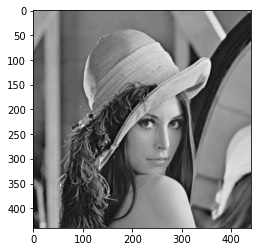

In [4]:
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
vertical_filter = np.array([[1., 2., 1],
                            [0., 0., 0],
                            [-1., -2., -1]])

horizontal_filter = np.array([[1., 0., -1],
                              [2., 0., -2],
                              [1., 0., -1]])

output_size = int((image.shape[0]-3)/1 + 1)
print("output_size :", output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

output_size : 438


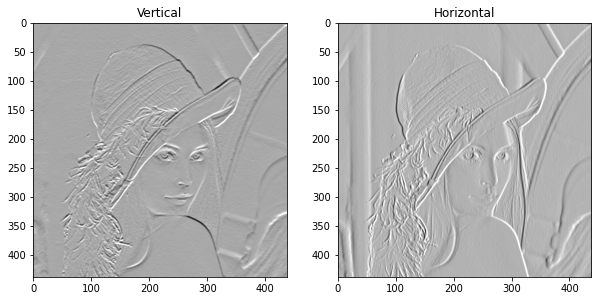

In [6]:
plt.figure(figsize = (10, 10))

plt.subplot(1,2,1)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')

plt.subplot(1,2,2)
plt.title("Horizontal")
plt.imshow(horizontal_filtered, cmap='gray')
plt.show()